# Step 1 :Import Dependencies

In [2]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 2 :Load and Preprocess the Data

load the MNIST dataset and preprocess it :

In [3]:
#Load the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalise the images to a range of [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Reshape the images to have a single channel (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Convert labels to One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Build the Neural Network Model

Create a simple convolutionsal neural network (CNN) :

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/sain/miniforge3/envs/CNN-test/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730711969.745221   15929 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730711969.885893   15929 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730711969.889738 

# Step 4: Compile the Model



In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Step 5: Train the Model

Fit the model to the

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


I0000 00:00:1730711972.192277   16506 service.cc:146] XLA service 0x78ce2c00c600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730711972.192298   16506 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-04 14:49:32.229134: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 14:49:32.358214: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


 62/750 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5342 - loss: 1.5440

I0000 00:00:1730711973.891419   16506 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8661 - loss: 0.4507 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9832 - val_loss: 0.0568
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0426 - val_accuracy: 0.9881 - val_loss: 0.0437
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9877 - val_loss: 0.0402
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0.9882 - val_loss: 0.0436


# Step 6: Evaluate the Model

Evaluate the model's performence on the test set :

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0429
Test accuracy: 0.988700


# Step 7: Visualize the Results

plot the training and validation accuracy and loss

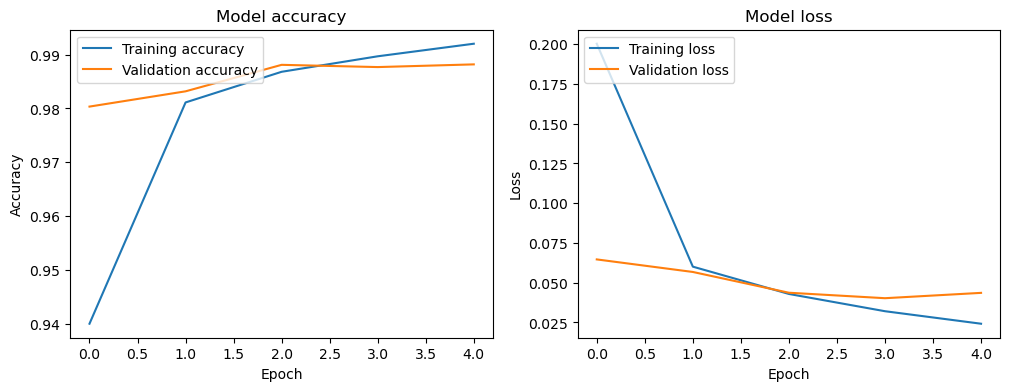

In [8]:
#Plot training & validation accuracy values
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

#Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Step 8: Make Predictions

(Optional) You can make predictions and visualise some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


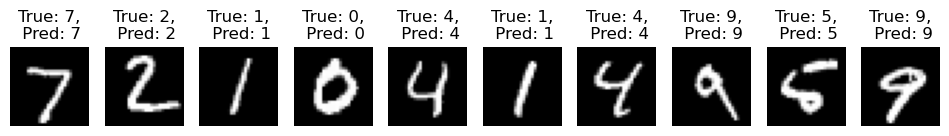

In [9]:
predictions = model.predict(x_test)

# Visualize same predictions
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()},\n Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()